# ECD-UY: Electric water heater subset

This notebook presents the minimum code steps to load the subset and start to work with its records.

## Load the needed libraries

In [2]:
# python
import datetime
from typing import List, Tuple, Union
import glob
from os.path import join, exists
from os import makedirs
import warnings
from datetime import datetime, timedelta

# data-science
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ciso8601

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 5]
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

print("Pandas version {}".format(pd.__version__))

Populating the interactive namespace from numpy and matplotlib
Pandas version 1.0.5


/Users/jp/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Download the subset

In [3]:
!curl -O https://url-to-repo/ecd-uy/electric-water-heater-subset.tar.gz
!tar xzf electric-water-heater.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: url-to-repo
tar: Error opening archive: Failed to open 'electric-water-heater.tar.gz'


## Declare the path where the files are located

In [4]:
BASE_DATA_SOURCE = "../../DATOS-CARACTERIZACION-UTE-STANDARDIZED"
# BASE_DATA_SOURCE = "./electric-water-heater-subset"

## Load customers data

In [5]:
data_customers = pd.read_csv(
    BASE_DATA_SOURCE + '/customers.csv',
)
data_customers.head()

,customer_id,tension,tariff,power,department,section,segment,zone
0,26429,BT 230 V,TRS,9500,16.0,1.0,18.0,2.0
1,2293,BT 230 V,TGS,4400,16.0,1.0,13.0,15.0
2,58415,BT 230 V,TRS,3700,14.0,1.0,113.0,26.0
3,5893,BT 230 V,TRS,6200,16.0,1.0,13.0,6.0
4,29815,BT 230 V,UTE,9200,3.0,37.0,136.0,5.0


## Load customer history data

In [6]:
data_customers = pd.read_csv(
    BASE_DATA_SOURCE + '/customers_history.csv',
)
data_customers.head()

,customer_id,tension,start_datetime,end_datetime,power,consumption,avg_monthly_billing
0,16752,BT,2017-01-01,2017-01-02,4600,202.0,NaN
1,16752,BT,2017-01-02,2017-01-03,4600,187.0,2007.88
2,16752,BT,2017-01-03,2017-01-04,4600,224.0,2007.88
3,16752,BT,2017-01-04,2017-01-05,4600,288.0,2007.88
4,16752,BT,2017-01-05,2017-01-06,4600,360.0,2007.88


## Load appliance-customer relationship data

In [7]:
data_appl_cust = pd.read_csv(
    BASE_DATA_SOURCE + '/appl_meter_customer_rel.csv',
)
data_appl_cust.head()

,app_meter_id,customer_id
0,10499368,67
1,10501062,105
2,10501602,35
3,10499273,18
4,10499242,60


## Load the appliance consumption data

In [8]:
filenames = glob.glob(BASE_DATA_SOURCE + '/appl_consumption_data_*.csv')

data_appl_consum = [pd.read_csv(
    fname,
    # parse_dates=["datetime"],
    # date_parser=lambda x: ciso8601.parse_datetime(x),
    # cache_dates=True,
) for fname in filenames]

data_appl_consum = pd.concat(data_appl_consum, ignore_index=True)

data_appl_consum.head()

,datetime,app_meter_id,value,voltage
0,2018-09-01 00:00:55-03:00,866131033542461,0.0,28
1,2018-09-01 00:00:57-03:00,866131033547650,0.0,223
2,2018-09-01 00:00:49-03:00,866131033550118,0.0,234
3,2018-09-01 00:00:55-03:00,866873020621150,4.2,0
4,2018-09-01 00:01:55-03:00,866131033542461,0.0,28


## Load main meter-customer relationship data

In [9]:
data_appl_cust = pd.read_csv(
    BASE_DATA_SOURCE + '/meter_customer_rel.csv',
)
data_appl_cust.head()

,meter_id,customer_id
0,1929257,16392
1,2238739,71
2,2267847,59001
3,2272395,59002
4,2256283,59003


## Load the total consumption data

In [10]:
filenames = glob.glob(BASE_DATA_SOURCE + '/consumption_data_*.csv')

data_total_consum = [pd.read_csv(
    fname,
    # parse_dates=["datetime"],
    # date_parser=lambda x: ciso8601.parse_datetime(x),
    # cache_dates=True,
) for fname in filenames]

data_total_consum = pd.concat(data_total_consum, ignore_index=True)

print("Number of water heating consumptions records:")
print(data_total_consum.shape)
data_total_consum.head()

Number of water heating consumptions records:
(10663277, 8)


,datetime,meter_id,active_in,active_out,reactive_quad1,reactive_quad2,reactive_quad3,reactive_quad4
0,2018-01-01 00:00:00-03:00,2257983,0.024,0.0,0.029,0.0,0.0,0.003
1,2018-01-01 00:00:00-03:00,2389927,0.000,0.0,0.000,0.0,0.0,0.000
2,2018-01-01 00:00:00-03:00,3710025,0.347,0.0,0.050,0.0,0.0,0.000
3,2018-01-01 00:00:00-03:00,3768811,0.147,0.0,0.121,0.0,0.0,0.000
4,2018-01-01 00:00:00-03:00,3772277,0.056,0.0,0.000,0.0,0.0,0.012


## Example
Average total and electric water heater consumption per hour of the day, during the month of August of 2017.

In [12]:
data_appl_consum_201708 = data_appl_consum[data_appl_consum.datetime.str.startswith("2017-08")]
data_appl_consum_201708['datetime'] = data_appl_consum_201708.datetime.apply(lambda x: ciso8601.parse_datetime(x))
data_appl_consum_201708.head()

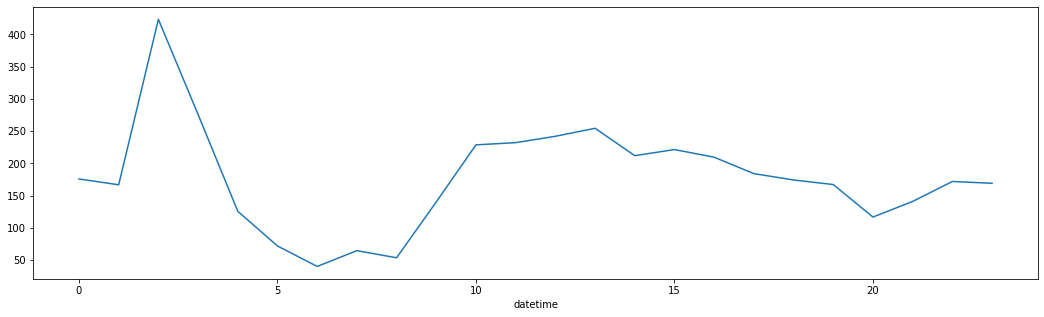

In [23]:
data_appl_consum_201708[
    (data_appl_consum_201708.datetime.dt.year == 2017) & (data_appl_consum_201708.datetime.dt.month == 8)
].groupby(data_appl_consum_201708.datetime.dt.hour)['value'].mean().plot()

In [17]:
data_total_consum_201708 = data_total_consum[data_total_consum.datetime.str.startswith("2017-08")]
data_total_consum_201708['datetime'] = data_total_consum_201708.datetime.apply(lambda x: ciso8601.parse_datetime(x))
data_total_consum_201708.head()

,datetime,meter_id,active_in,active_out,reactive_quad1,reactive_quad2,reactive_quad3,reactive_quad4
3669533,2017-08-01 00:00:00-03:00,2257983,0.188,0.0,0.001,0.0,0.0,0.028
3669534,2017-08-01 00:00:00-03:00,2389927,0.000,0.0,0.000,NaN,NaN,NaN
3669535,2017-08-01 00:00:00-03:00,3710025,0.562,0.0,0.039,0.0,0.0,0.005
3669536,2017-08-01 00:00:00-03:00,3768811,0.387,0.0,0.114,0.0,0.0,0.000
3669537,2017-08-01 00:00:00-03:00,3772277,0.226,0.0,0.019,0.0,0.0,0.015


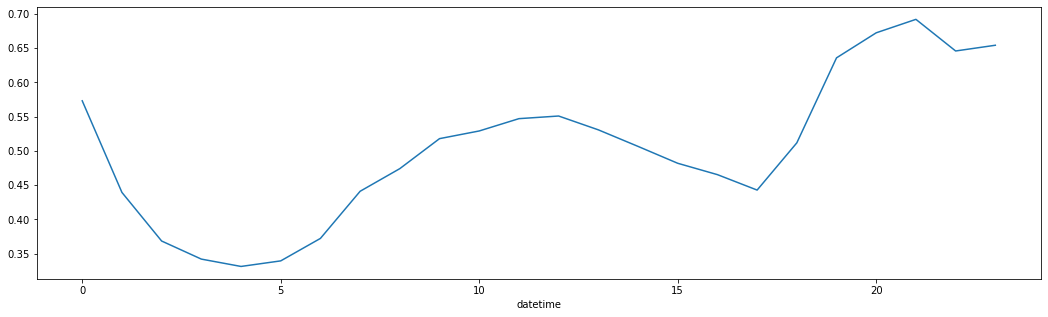

In [25]:
data_total_consum_201708[
    (data_total_consum_201708.datetime.dt.year == 2017) & (data_total_consum_201708.datetime.dt.month == 8)
].groupby(by=data_total_consum_201708.datetime.dt.hour).active_in.mean().plot()